# Определение перспективного тарифа для телеком компании

#### Описание проекта

Для корректировки рекламного бюджета, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

По анализу поведения клиентов мы определим, какой тариф лучше и приносит большую прибыль, чтобы вкладывать в него бюджет в дальнейшем.

#### Описание тарифов

#### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
 - минута разговора: 3 рубля
 - сообщение: 3 рубля
 - 1 Гб интернет-трафика: 200 рублей

#### Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
 - минута разговора: 1 рубль
 - сообщение: 1 рубль
 - 1 Гб интернет-трафика: 150 рублей

#### Описание данных

Таблица users (информация о пользователях):
 - user_id — уникальный идентификатор пользователя
 - first_name — имя пользователя
 - last_name — фамилия пользователя
 - age — возраст пользователя (годы)
 - reg_date — дата подключения тарифа (день, месяц, год)
 - churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
 - city — город проживания пользователя
 - tariff — название тарифного плана

Таблица calls (информация о звонках):
 - id — уникальный номер звонка
 - call_date — дата звонка
 - duration — длительность звонка в минутах
 - user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
 - id — уникальный номер сообщения
 - message_date — дата сообщения
 - user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
 - id — уникальный номер сессии
 - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
 - session_date — дата интернет-сессии
 - user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
 - tariff_name — название тарифа
 - rub_monthly_fee — ежемесячная абонентская плата в рублях
 - minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
 - messages_included — количество сообщений в месяц, включённых в абонентскую плату
 - mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
 - rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
 - rub_per_message — стоимость отправки сообщения сверх тарифного пакета
 - rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Шаг 1. Откроем файл с данными и изучим общую информацию. 

Для начала импортируем бибилиотеки, которые пригодятся нам в дальнейшем.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Воспользуемся методом read_csv, чтобы прочитать информацию, которую нам дал заказчик. И сразу же проверим содержание пропущеннных значений в столбцах. Это необходимо учитывать, так как в дальнейшем мы планируем объединять почти все датафреймы.

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
messages = pd.read_csv('/datasets/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [4]:
internet = pd.read_csv('/datasets/internet.csv')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
users = pd.read_csv('/datasets/users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Нашему вниманию представлены 5 таблиц со всеми необходимыми данными. Такие, как, информация о звонках, сообщениях, интернет- трафике, о самих тарифах, и, конечно, о пользователях.

Для более удобной работы с информацией, необходимо объединить все таблицы в одну общую. Чтобы все, что нам необходимо было в одном месте.

Для этого сначала сгруппируем датафреймы по столбцу 'user_id' и 'month'. Столбец с месяцем создадим сами, потому, что нас интересует помесячная тарификация и для этого нам не нужна информация по дням. Хватит и месяца.

Сначала проверим какие типы данных содержат столбцы в дф, чтобы можно было работать с датой.

In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Мы видим, что столбцы с датой находятся не в типе данных datetime, а в object. Изменим тип данных у этих столбцов.

In [10]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y.%m.%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y.%m.%d')

Создаем новый столбец с номером месяца.

In [11]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

In [12]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


И проведем группировку. Заодно выведем первые 5 строк каждой таблицы, чтобы посмотреть как это выглядит. Также сбросим индексы у дф, чтобы в дальнейшем было удобнее с ними работать и не терять столбцы.

In [13]:
calls_group = (calls.groupby(['user_id', 'month'])
               .agg({'duration':'sum', 'id':'count'})
               .rename(columns={'id':'calls_count'})
              )
calls_group.head()

duration  calls_count
user_id month                       
1000    5        150.06           22
        6        158.90           43
        7        318.80           47
        8        389.87           52
        9        440.14           58

In [14]:
messages_group = (messages.groupby(['user_id', 'month'])
                  .agg({'id':'count'})
                  .rename(columns={'id':'messages_count'})
                 )
messages_group.head()

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57

In [15]:
internet_group = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'})
internet_group.head()

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91

Мы получили три таблицы с информацией о том, каким пользователем было использовано сколько минут, смс и трафика. И в каком месяце сколько он потратил.

Объединим эти три таблицы, группируя по столбцу 'user_id' и 'month'.

In [16]:
megaline = calls_group.merge(messages_group, on=['user_id', 'month'], how='outer')
megaline.head()

duration  calls_count  messages_count
user_id month                                       
1000    5        150.06         22.0            22.0
        6        158.90         43.0            60.0
        7        318.80         47.0            75.0
        8        389.87         52.0            81.0
        9        440.14         58.0            57.0

In [17]:
megaline = megaline.merge(internet_group, on=['user_id', 'month'], how='outer').reset_index()
megaline.head()

,user_id,month,duration,calls_count,messages_count,mb_used
0,1000,5,150.06,22.0,22.0,2253.49
1,1000,6,158.90,43.0,60.0,23233.77
2,1000,7,318.80,47.0,75.0,14003.64
3,1000,8,389.87,52.0,81.0,14055.93
4,1000,9,440.14,58.0,57.0,14568.91


В итоге мы получили общую таблицу, в которой содержится информация о помесячном использовании тарифа, определенным пользователем.

И теперь эту таблицу объединяем с общей информацией о пользователях.

In [18]:
megaline = megaline.merge(users, on='user_id', how='left')
megaline.head()

,user_id,month,duration,calls_count,messages_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,150.06,22.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,158.90,43.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,318.80,47.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,389.87,52.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,440.14,58.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Для дальнейщих расчетов удобнее будет, если в этом же дф будет и сразу информация о тарифе, который используется. Поэтому завершим объединение, присоединяя к этому дф информацию о тарифе. Но для начала в дф, с описанием тарифа сменим название столбца с 'tariff_name' на 'tariff', как и в нашем дф.

In [19]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [20]:
megaline = megaline.merge(tariffs, on='tariff', how='left')
megaline.head()

,user_id,month,duration,calls_count,messages_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,150.06,22.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,158.90,43.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,318.80,47.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,389.87,52.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,440.14,58.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Теперь мы получили готовую таблицу, содержащую всю информацию, что нам необходима. Посмотрим, какие она содержит типы данных, сколько у нееимеется строк, столбцов и посмотрим на все названия столбцов.

In [21]:
megaline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
duration                 3174 non-null float64
calls_count              3174 non-null float64
messages_count           2717 non-null float64
mb_used                  3203 non-null float64
age                      3214 non-null int64
churn_date               187 non-null object
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null object
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           

Мы видим, что в нескольких столбцах у нас присутствуют пропущенные значения. Это связано с тем, что мы присоединяли меньший дф к большему. И получается, что у нас и не было этих значений. Пропуски в столбце 'churn_date'(дата прекращения пользования тарифом) присутствуют потому, что тариф еще действовал, а договор был не расторгнут, на момент выгрузки общей информации. В следующем шаге мы не будем заменять его пропущенные значения на какие-либо, потому, что у нас нет необходимости в этом столбце для исследования.

### Шаг 2. Подготовка данных

- Приводим данные к нужным типам;
- Найдем и исправим ошибки в данных.

Из очевидного, заменим тип данных в столбце 'reg_date' с object на datetime.

In [22]:
megaline['reg_date'] = pd.to_datetime(megaline['reg_date'], format='%Y.%m.%d')

Cтолбец 'messages_count' можно заменить на тип данных integer, но прежде необходимо заполнить пропущенные значения. Если в этом столбце есть NaN, это означает то, что этим пользователем в этот месяц не были совершены отправки сообщений. Соответветственно, статистике не навредит, если мы пропущенные значения заменим на 0. Наоборот, это покажет, что есть люди, которые в данном ключе этим тарифом не пользуются. Они появились лишь после merge. Это означает то, что эти люди не отправляли смс.

In [23]:
megaline['messages_count'] = megaline['messages_count'].fillna(0)
megaline['messages_count'] = megaline['messages_count'].astype('int')

Также поступим со столбцом с количеством звонков(calls_count).

In [24]:
megaline['calls_count'] = megaline['calls_count'].fillna(0)
megaline['calls_count'] = megaline['calls_count'].astype('int')

По заданию нам дано: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. В соответствии с этим, округлим значения времени разговора и трафика.

Далее, у нас изначально были 0 в значениях столбца продолжительности разговора и трафика. По условию задачи мы считаем, что у нас присутствуют данные с ошибками. И эта ошибка это нулевые значение в столбце продолжительности разговора. Сначала мы добавим к столбцу продолжительности разговора 1, а уже потом заменим пропущенные значения на 0, так как пропущенные значения означают 100% факт не использования данной услуги.

In [25]:
megaline['duration'] = megaline['duration'] + 1
megaline['mb_used'] = megaline['mb_used'] + 1

In [26]:
megaline['duration'] = megaline['duration'].fillna(0)
megaline['mb_used'] = megaline['mb_used'].fillna(0)

И заменим тип данных на целочисленный, так как оператор сам округляет значения в большую сторону, значит десятые доли нам для расчетов не пригодятся.

In [27]:
megaline['duration'] = megaline['duration'].astype('int')
megaline['mb_used'] = megaline['mb_used'].astype('int')

Проверим как у нас работала замена пропущенных данных.

In [28]:
megaline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
duration                 3214 non-null int64
calls_count              3214 non-null int64
messages_count           3214 non-null int64
mb_used                  3214 non-null int64
age                      3214 non-null int64
churn_date               187 non-null object
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           

Все необходимые пропущенные значения нам удалось успешно заменить.

Мы видим, что в использованном интернет- трафике расчет ведется в мегабайтах, а оплата сверх установленной тарифом нормы производится в гигабайтах. Поэтому мы переведем столбец 'rub_per_gb' в расчет рубль за мегабайт. Так как 1ГБ = 1024МБ. Поделим столбец рубль за гигабайт на 1024 и получим рубль за мегабайт.

In [29]:
megaline['rub_per_mb'] = megaline['rub_per_gb'] / 1024

Далее по заданию нам необходимо произвести расчеты и добавить новые столбцы с необходимыми нам значениями.

Так получилось, что в группировке перед объединением таблиц мы уже посчитали три пункта из четырех. Получается, осталось посчитать помесячную выручку с каждого пользователя.

Для этого мы вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану.

Сначала найдем значения, которые превышают установленный бесплатный лимит по звонкам, сообщениям и трафику. Так как он может получится меньше 0, то создадим функцию, чтобы те значения, которые будут меньше 0, изменились на 0, а если больше 0, то остались прежними.

In [30]:
megaline['minutes_for_pay'] = megaline['duration'] - megaline['minutes_included']
megaline['messages_for_pay'] = megaline['messages_count'] - megaline['messages_included']
megaline['mb_for_pay'] = megaline['mb_used'] - megaline['mb_per_month_included']

In [31]:
def remains_call(megaline):
    if megaline['minutes_for_pay'] <= 0:
        return 0
    else:
        return megaline['minutes_for_pay']

megaline['minutes_for_pay'] = megaline.apply(remains_call, axis = 1)

In [32]:
def remains_mes(megaline):
    if megaline['messages_for_pay'] <= 0:
        return 0
    else:
        return megaline['messages_for_pay']

megaline['messages_for_pay'] = megaline.apply(remains_mes, axis = 1)

In [33]:
def remains_mb(megaline):
    if megaline['mb_for_pay'] <= 0:
        return 0
    else:
        return megaline['mb_for_pay']

megaline['mb_for_pay'] = megaline.apply(remains_mb, axis = 1)

И по формуле посчитаем, сколько мы получаем в месяц с определенного пользователя.

In [34]:
megaline['total_payment'] = (megaline['rub_monthly_fee'] 
                             + megaline['minutes_for_pay'] * megaline['rub_per_minute'] 
                             + megaline['messages_for_pay'] * megaline['rub_per_message'] 
                             + megaline['mb_for_pay'] * megaline['rub_per_mb']
                            )

Посмотрим появились ли таблицы, которые мы добавили.

In [35]:
megaline.head()

,user_id,month,duration,calls_count,messages_count,mb_used,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rub_per_mb,minutes_for_pay,messages_for_pay,mb_for_pay,total_payment
0,1000,5,151,22,22,2254,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,0.146484,0,0,0,1950.0
1,1000,6,159,43,60,23234,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,0.146484,0,0,0,1950.0
2,1000,7,319,47,75,14004,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,0.146484,0,0,0,1950.0
3,1000,8,390,52,81,14056,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,0.146484,0,0,0,1950.0
4,1000,9,441,58,57,14569,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,0.146484,0,0,0,1950.0


Мы подготовили данные, которые нам необходимы для дальнейших расчетов. Мы устранили ошибки в исходных данных с 0 значением продолжительности вызовов, а также посчитали и добавили в таблицу те данные, которые нам пригодятся в дальнейшем, чтобы с помощью них ответить на поставленные нам вопросы.

### Шаг 3. Анализ данных.

В этом шаге нам необходимо описать поведение клиентов оператора, исходя из выборки: 
 - Посчитать сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
 - Посчитать среднее количество, дисперсию и стандартное отклонение. 
 - Построить гистограммы. Описать распределения.

Создадим две выборки и применим describe() к каждой из них. С помощью нее определим сколько всего минут, сообщений и трафика используют клиенты в каждом из них. Будем смотреть по показателю mean, то есть среднее, сколько в среднем на человека необходимо этих опций.

Для начала создадим выборку с пользователями тарифа Смарт. У нас получается, что каждое наблюдение - это определенный пользователь использовал в определенный месяц. Тогда если мы применим describe(), среднее значение столбца будет средним значением одного пользователя в месяц.

In [36]:
clients_of_smart = megaline.query('tariff == "smart"')[['duration', 'mb_used', 'messages_count', 'total_payment']]

In [37]:
clients_of_smart.describe()

,duration,mb_used,messages_count,total_payment
count,2229.000000,2229.000000,2229.000000,2229.000000
mean,394.926873,16208.878869,33.384029,1198.113977
std,179.975748,5870.481414,28.227876,767.844477
min,0.000000,0.000000,0.000000,550.000000
25%,268.000000,12644.000000,10.000000,550.000000
50%,398.000000,16507.000000,28.000000,925.585938
75%,516.000000,20043.000000,51.000000,1603.195312
max,1355.000000,38553.000000,143.000000,6543.882812


Каждому пользователю тарифа "Смарт", в среднем, требуется:
- 394,9 минут разговора
- 16208 МБайт интернета
- 33 cообщения

Каждый пользователь в среднем платит за тариф 1198,1 рубль в месяц.

И точно такие же действия произведем с пользователями тарифа Ультра.

In [38]:
clients_of_ultra = megaline.query('tariff == "ultra"')[['duration', 'mb_used', 'messages_count', 'total_payment']]

In [39]:
clients_of_ultra.describe()

,duration,mb_used,messages_count,total_payment
count,985.000000,985.000000,985.000000,985.000000
mean,497.554315,19469.312690,49.363452,2059.879640
std,299.921855,10087.193402,47.804457,354.901048
min,0.000000,0.000000,0.000000,1950.000000
25%,268.000000,11771.000000,6.000000,1950.000000
50%,489.000000,19309.000000,38.000000,1950.000000
75%,712.000000,26838.000000,79.000000,1950.000000
max,1579.000000,49746.000000,224.000000,4737.011719


Каждому пользователю тарифа "Ультра", в среднем, требуется:
- 497,6 минут разговора
- 19469,3 МБайт интернета
- 49 cообщений

Каждый пользователь в среднем платит за тариф 2059,9 рубль в месяц.

C помощью describe() мы уже нашли стандартное отклонение и среднее. Они находятся в строке 'std' и 'mean', соответственно.

Далее необходимо посчитать дисперсию. Дисперсия показывает, насколько данные сильно "разбросаны". Это метрика разброса значений относительно среднего.

### Расчитанные значения для клиентов тарифа Смарт.

#### Среднее значение выборки:
- длительности звонков: 394.926873
- количества смс: 16208.878869
- количества трафика: 33.384029
- месячная оплата: 1198.113977

#### Стандратное отклонение выборки:
- длительности звонков: 179.975748 
- количества смс: 5870.481414 
- количества трафика: 28.227876
- месячная оплата: 767.844477

#### Дисперсия выборки:

In [40]:
var_smart_dur = np.var(clients_of_smart['duration'], ddof=1)
print('длительности звонков:', var_smart_dur)
var_smart_mes = np.var(clients_of_smart['messages_count'], ddof=1)
print('количества смс:', var_smart_mes)
var_smart_mb = np.var(clients_of_smart['mb_used'], ddof=1)
print('количества трафика:', var_smart_mb)
var_smart_rub = np.var(clients_of_smart['total_payment'], ddof=1)
print('месячная оплата:', var_smart_rub)

длительности звонков: 32391.26978469707
количества смс: 796.8129584480083
количества трафика: 34462552.035590105
месячная оплата: 589585.1402454089


### Расчитанные значения для клиентов тарифа Ультра.

#### Среднее значение выборки:
- длительности звонков: 497.554315
- количества смс: 19469.312690
- количества трафика: 49.363452
- месячная оплата: 2059.879640

#### Стандратное отклонение выборки:
- длительности звонков: 299.921855 
- количества смс: 10087.193402 
- количества трафика: 47.804457
- месячная оплата: 354.901048

#### Дисперсия выборки:

In [41]:
var_ultra_dur = np.var(clients_of_ultra['duration'], ddof=1)
print('длительности звонков:', var_ultra_dur)
var_ultra_mes = np.var(clients_of_ultra['messages_count'], ddof=1)
print('количества смс:', var_ultra_mes)
var_ultra_mb = np.var(clients_of_ultra['mb_used'], ddof=1)
print('количества трафика:', var_ultra_mb)
var_ultra_rub = np.var(clients_of_ultra['total_payment'], ddof=1)
print('месячная оплата:', var_ultra_rub)

длительности звонков: 89953.11925219759
количества смс: 2285.2661425446736
количества трафика: 101751470.73139368
месячная оплата: 125954.75412830498


Построим гистограммы по каждому пункту. И по длительности звонков, по смс, трафику и затратам клиента на тариф. Так как нам необходимо сравнивать два тарифа, то мы будем строить две гистограммы сразу, по одному пункту для разных тарифов. Также для сравнивания идеально подойдет диаграмма размаха. Построим и их тоже.

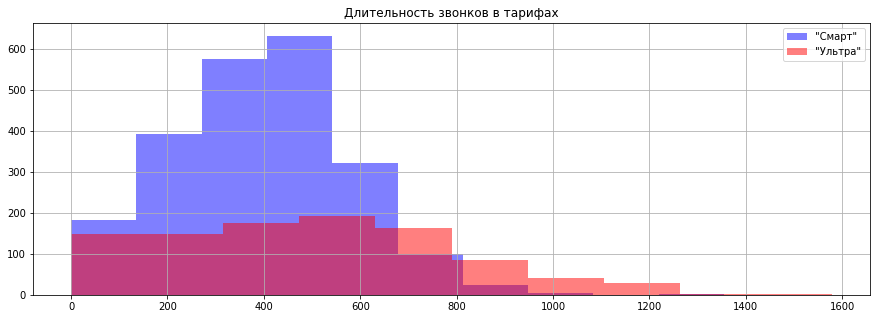

In [42]:
plt.subplots(figsize=(15,5))
clients_of_smart['duration'].hist(label = '"Смарт"', alpha = 0.5, color= 'b')
clients_of_ultra['duration'].hist(label = '"Ультра"', alpha = 0.5, color= 'r')
plt.title('Длительность звонков в тарифах')
plt.legend()
plt.show()

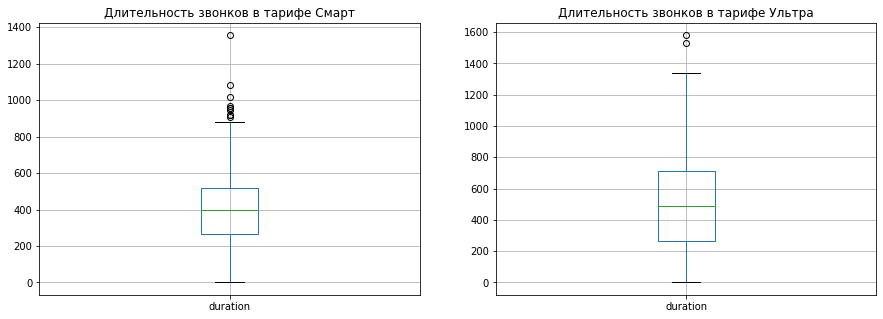

In [43]:
plt.subplots(figsize=(15,5))
clients_of_smart.boxplot(column = 'duration', ax=plt.subplot(1,2,1))
plt.title('Длительность звонков в тарифе Смарт')
clients_of_ultra.boxplot(column = 'duration', ax=plt.subplot(1,2,2))
plt.title('Длительность звонков в тарифе Ультра')
plt.show()

Обе гистограммы скошенны вправо.

Мы видим, что на тарифе Смарт звонки хоть по гистограмме и располагаются выше, но по диаграмме размаха среднее по длительности больше на тарифе Ультра. И разброс на тарифе Ультра больше, но при этом в него включено бесплатных минут в 6 раз больше(500 на Смарт против 3000 на Ультра), чем на тарифе Смарт, а клиенты эти 3000 минут даже и не набирают. Но на Смарт пользователи почти в 3 раза превышают установленный неоплачиваемый лимит, а значит, они переплачивают. 

С точки зрения прибыли, в плане звонков, компании выгоднее вкладываться в Смарт, так как он вроде бы и по абонентской плате стоит не дорого, но при этом его лимитов людям недостаточно и они сильно переплачивают.

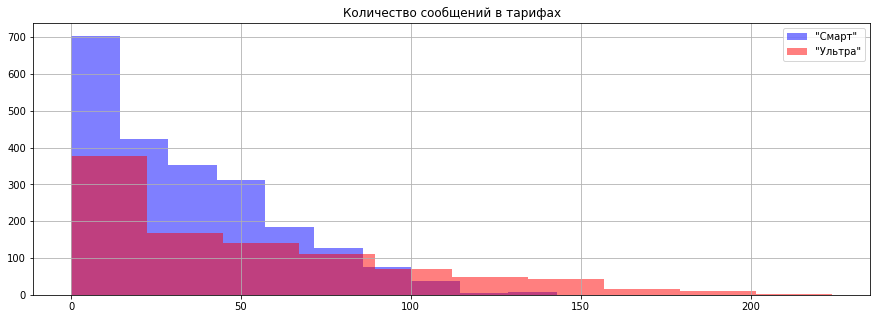

In [44]:
plt.subplots(figsize=(15,5))
clients_of_smart['messages_count'].hist(label = '"Смарт"', alpha = 0.5, color= 'b')
clients_of_ultra['messages_count'].hist(label = '"Ультра"', alpha = 0.5, color= 'r')
plt.title('Количество сообщений в тарифах')
plt.legend()
plt.show()

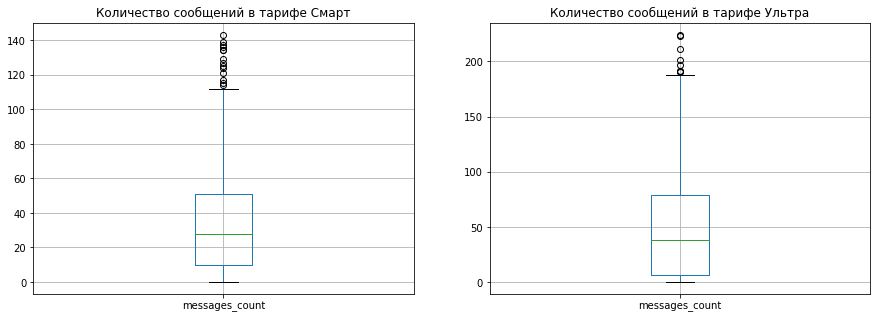

In [45]:
plt.subplots(figsize=(15,5))
clients_of_smart.boxplot(column = 'messages_count', ax=plt.subplot(1,2,1))
plt.title('Количество сообщений в тарифе Смарт')
clients_of_ultra.boxplot(column = 'messages_count', ax=plt.subplot(1,2,2))
plt.title('Количество сообщений в тарифе Ультра')
plt.show()

На тарифе Ультра гораздо больше клиентов отправляют большое количество сообщений, чем на Смарт. И ситуация все такая же, как и со звонками. На тарифе Ультра пользователи даже близко не набирают установленных лимитов, а на Смарт в разы выходят за эти пределы. Учитывая,что за каждое сообщение за пределами лимита на тарифе Смарт клиенты платят 3 рубля, а лимиты превышены примерно в 3 раза, можно представить, что и у компании доходы будут больше, за счет превышения этих лимитов.

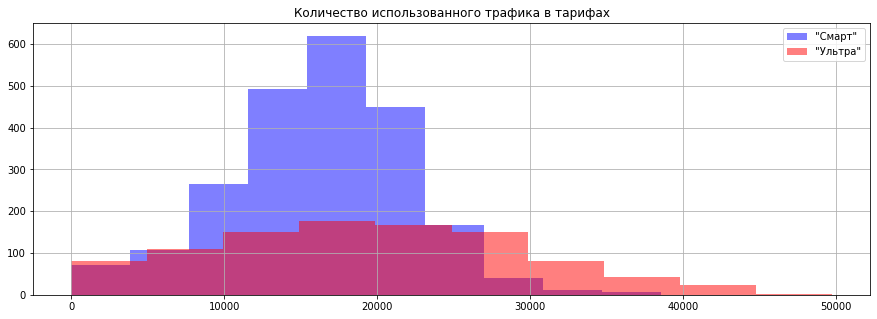

In [46]:
plt.subplots(figsize=(15,5))
clients_of_smart['mb_used'].hist(label = '"Смарт"', alpha = 0.5, color= 'b')
clients_of_ultra['mb_used'].hist(label = '"Ультра"', alpha = 0.5, color= 'r')
plt.title('Количество использованного трафика в тарифах')
plt.legend()
plt.show()

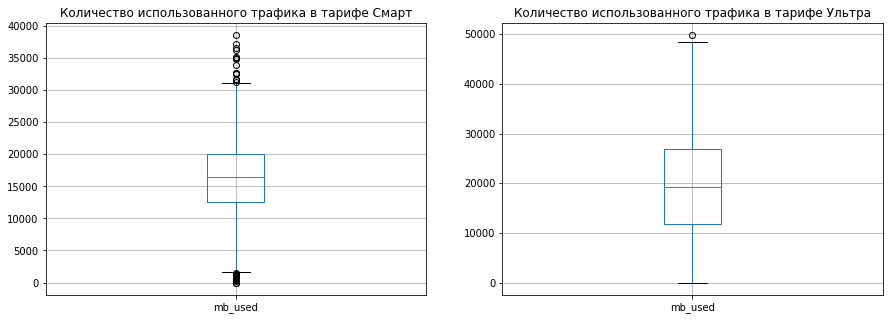

In [47]:
plt.subplots(figsize=(15,5))
clients_of_smart.boxplot(column = 'mb_used', ax=plt.subplot(1,2,1))
plt.title('Количество использованного трафика в тарифе Смарт')
clients_of_ultra.boxplot(column = 'mb_used', ax=plt.subplot(1,2,2))
plt.title('Количество использованного трафика в тарифе Ультра')
plt.show()

По количеству использованного трафика пользователи Смарт почти догоняют пользователей Ультра. Но надо сказать, что в плане интернета лимиты превышены и у клиентов Ультра, но цена у них за переплату меньше, а среднее использованное количество трафика больше не намного.

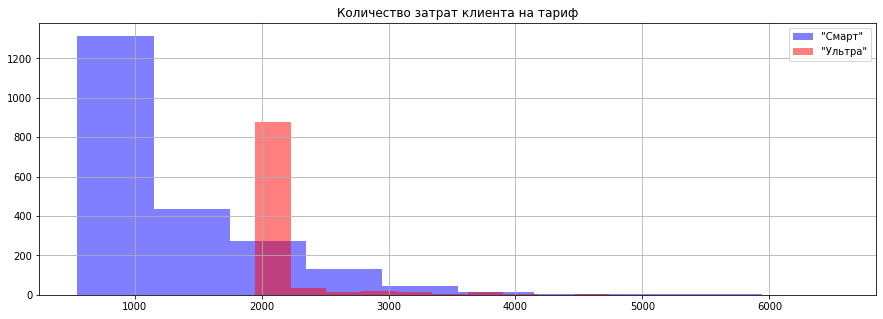

In [48]:
plt.subplots(figsize=(15,5))
clients_of_smart['total_payment'].hist(label = '"Смарт"', alpha = 0.5, color= 'b')
clients_of_ultra['total_payment'].hist(label = '"Ультра"', alpha = 0.5, color= 'r')
plt.title('Количество затрат клиента на тариф')
plt.legend()
plt.show()

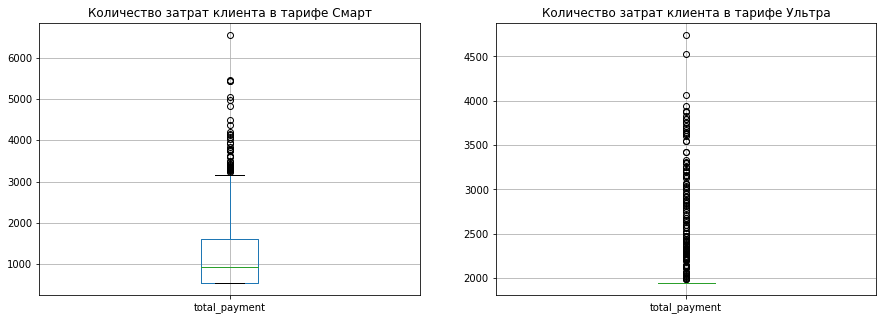

In [49]:
plt.subplots(figsize=(15,5))
clients_of_smart.boxplot(column = 'total_payment', ax=plt.subplot(1,2,1))
plt.title('Количество затрат клиента в тарифе Смарт')
clients_of_ultra.boxplot(column = 'total_payment', ax=plt.subplot(1,2,2))
plt.title('Количество затрат клиента в тарифе Ультра')
plt.show()

Мы видим, что максимальное количество затрат приходится на абонентскую плату, при этом, как мы видим, в тарифе "Смарт" люди чаще не укладываются в доступные бесплатные звонки, смс и интернет, а потому и чаще приходится доплачивать. Тарифом "Ультра" пользуются значительно меньше людей, но и гораздо больше человек в пропорции укладывается в бесплатные доступные функции от тарифа, а соответственно, меньше людей переплачивают сверх абонентской платы.

И за счет этих переплат клиенты тарифа Смарт приносят компании денег больше, чем те, кто используют тариф Ультра. Поэтому, в рекламу тарифа Смарт компании будет вложиться гораздо эффективнее, ведь чем больше будет клиентов на тарифе Смарт, тем больше переплат, тем больше дохода, соответственно.

Чтобы точно быть уверенными, посчитаем какая доля людей выходит в оплате за установленную абонентскую плату, а какая нет. Этот показатель покажет, какому проценту пользователей достаточно функций тарифа.

Посчитаем, какая доля пользователей тарифа Смарт превышает установленную аб. плату.

In [50]:
len(clients_of_smart.query('total_payment > 550')) / len(clients_of_smart)

0.7312696276357111

И какая доля превышает аб.плату на тарифе Ультра.

In [51]:
len(clients_of_ultra.query('total_payment > 1950')) / len(clients_of_ultra)

0.13604060913705585

Мы обнаружили, что в тарифе Смарт 73,1% пользователей превышают в оплате абонентскую плату. В то время, как на тарифе Ультра только 13,6%.

Понятное дело, что некоторые клиенты тарифа Смарт, даже с переплатами не будут платить столько, сколько стоит аб. плата на тарифе Ультра. Но наверняка есть и те, кто превышают или хотя бы достигают платы за тариф Ультра, будучи на тарифе Смарт. Посчитаем их долю.

In [52]:
len(clients_of_smart.query('total_payment >= 1950')) / len(clients_of_smart)

0.15836698070883803

Этим 15,8% пользователей будет гораздо выгоднее перейти на другой тариф, но понятное дело, что выгода будет исключительно клиенту, а не компании.

### Шаг 4. Проверка гипотез

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

In [53]:
from scipy import stats as st

Cначала обработаем первый, заданный нам пункт.

#### Зададим две гипотезы:
1. Нулевая гипотеза - средние выручки компании от пользователей тарифов «Ультра» и «Смарт» равны.
2. Альтернативная гипотеза - средние выручки компании от пользователей тарифов «Ультра» и «Смарт» различаются.

In [54]:
smart_prices = megaline.query('tariff == "smart"')['total_payment']
ultra_prices = megaline.query('tariff == "ultra"')['total_payment']
alpha = 0.05
results = st.ttest_ind(smart_prices, ultra_prices, equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


Получается, раз нулевая гипотеза отвергнута, то средние выручки компании от пользователей тарифов «Ультра» и «Смарт» различаются. Следовательно на первый пункт задания мы ответили.

Также и второй пункт из задания.

#### Зададим две гипотезы:
1. Нулевая гипотеза - средняя выручка компании от пользователей из Москвы равна средней выручке компании от пользователей из других регионов.
2. Альтернативная гипотеза - средняя выручка компании от пользователей из Москвы отличается от средней выручки компании от пользователей из других регионов.

In [55]:
smart_prices_mos = megaline.query('tariff == "smart" & city == "Москва"')['total_payment']
smart_prices_other = megaline.query('tariff == "smart" & city != "Москва"')['total_payment']
alpha = 0.05
results = st.ttest_ind(smart_prices_mos, smart_prices_other, equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.13677321727080832
Не получилось отвергнуть нулевую гипотезу


In [56]:
ultra_prices_mos = megaline.query('tariff == "ultra" & city == "Москва"')['total_payment']
ultra_prices_other = megaline.query('tariff == "ultra" & city != "Москва"')['total_payment']
alpha = 0.05
results = st.ttest_ind(ultra_prices_mos, ultra_prices_other, equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8800863664482192
Не получилось отвергнуть нулевую гипотезу


А в этот раз нулевая гипотеза подтвердилась. И выходит, что средняя выручка компании от пользователей обоих тарифов из Москвы равна средней выручке компании от пользователей обоих тарифов из других регионов.

### Шаг 5. Общий вывод

Для корректировки рекламного бюджета, коммерческий департамент хотел понять, какой тариф приносит больше денег. 

Мы сделали предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении были данные 500 пользователей «Мегалайна». Мы сделали из этого анализа определенные выводы:

- разброс в продолжительности звонков на тарифе Ультра больше, но при этом в него включено бесплатных минут в 6 раз больше(500 на Смарт против 3000 на Ультра), чем на тарифе Смарт, а клиенты эти 3000 минут даже и не набирают. Но на Смарт пользователи почти в 3 раза превышают установленный неоплачиваемый лимит, а значит, они переплачивают.

-  точки зрения прибыли, в плане звонков, компании выгоднее вкладываться в Смарт, так как он вроде бы и по абонентской плате стоит не дорого, но при этом его лимитов людям недостаточно и они сильно переплачивают.

- на тарифе Ультра гораздо больше клиентов отправляют большое количество сообщений, чем на Смарт. И ситуация все такая же, как и со звонками. На тарифе Ультра пользователи даже близко не набирают установленных лимитов, а на Смарт в разы выходят за эти пределы. Учитывая,что за каждое сообщение за пределами лимита на тарифе Смарт клиенты платят 3 рубля, а лимиты превышены примерно в 3 раза, можно представить, что и у компании доходы будут больше, за счет превышения этих лимитов.

- по количеству использованного трафика пользователи Смарт почти догоняют пользователей Ультра. Но надо сказать, что в плане интернета лимиты превышены и у клиентов Ультра, но цена у них за переплату меньше, а среднее использованное количество трафика больше не намного.

Мы видим, что максимальное количество затрат приходится на абонентскую плату, при этом в тарифе "Смарт" люди чаще не укладываются в доступные бесплатные звонки, смс и интернет, а потому и чаще приходится доплачивать. Тарифом "Ультра" пользуются значительно меньше людей, но и гораздо больше человек в пропорции укладывается в бесплатные доступные функции от тарифа, а соответственно, меньше людей переплачивают сверх абонентской платы.

И за счет этих переплат клиенты тарифа Смарт приносят компании денег **больше**, чем те, кто используют тариф Ультра. Поэтому, в рекламу тарифа Смарт компании будет вложиться гораздо эффективнее, ведь чем больше будет клиентов на тарифе Смарт, тем больше переплат, тем больше дохода, соответственно.

Мы обнаружили, что в тарифе Смарт 73,1% пользователей превышают в оплате абонентскую плату. В то время, как на тарифе Ультра только 13,6%.

Некоторые клиенты тарифа Смарт, даже с переплатами не будут платить столько, сколько стоит аб. плата на тарифе Ультра. Но есть и те, кто превышают или хотя бы достигают платы за тариф Ультра, будучи на тарифе Смарт. Процент этих пользователей составляет 15,8%.

В пункте проверки гипотез мы выяснили, что средние выручки компании от пользователей тарифов «Ультра» и «Смарт» **различаются**, а средняя выручка компании от пользователей обоих тарифов из Москвы **равна** средней выручке компании от пользователей обоих тарифов из других регионов.